# Tutorial on DTM surface area and slope statistics

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import dblquad
from tqdm import trange

import surface_area as sa

pl.rcParams["figure.dpi"] = 200

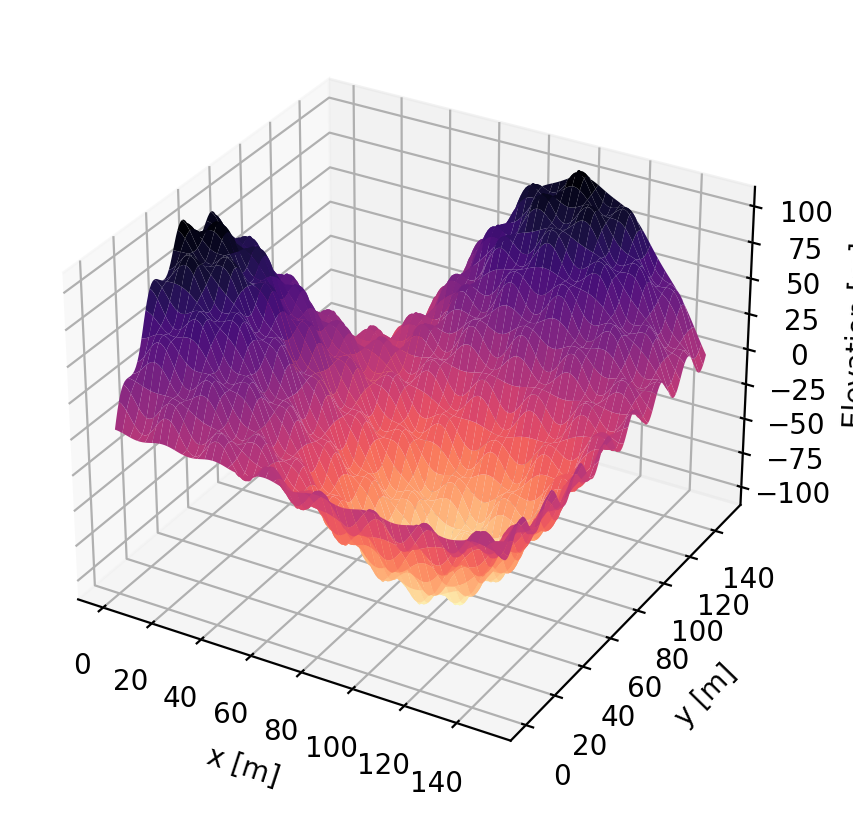

In [2]:
# DTM resolution
resolution = 1
xr = np.arange(resolution / 2, 150, resolution)
yr = xr

# synthetic landscape coordinates
x, y = np.meshgrid(xr, yr)

# Sin Cos DTM
dtm = sa.synthetic_landscape(x, y, landscape_type="sincos", amplitude=100)

# visuals
fg, ax = pl.subplots(figsize=(5, 5), subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, dtm, cmap="magma_r")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("Elevation [m]")
pl.show()

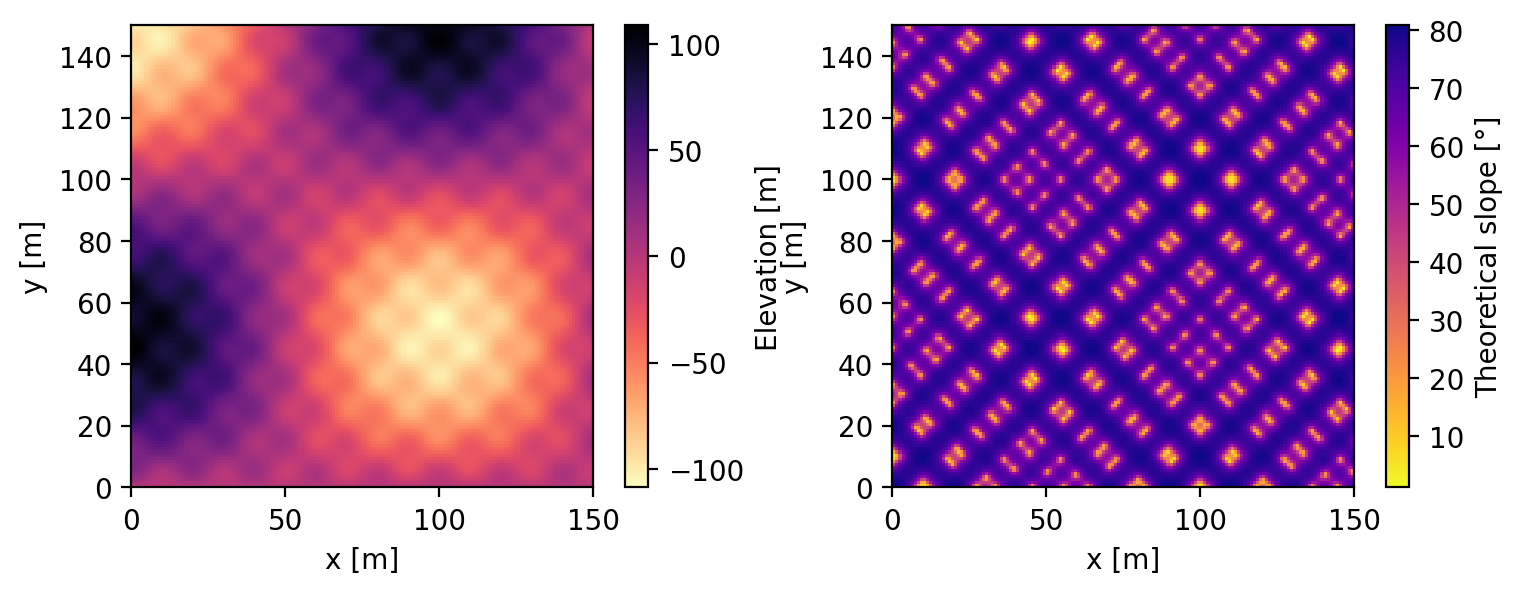

In [3]:
# theoretical slope
slp = (
    180
    / np.pi
    * sa.synthetic_landscape_slope(x, y, landscape_type="sincos", amplitude=100)
)

fg, ax = pl.subplots(1, 2, figsize=(9, 3))
im = ax[0].pcolormesh(x, y, dtm, cmap="magma_r")
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[0])
cb.set_label("Elevation [m]")
im = ax[1].pcolormesh(x, y, slp, cmap="plasma_r")
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[1])
cb.set_label("Theoretical slope [°]")
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
pl.show()

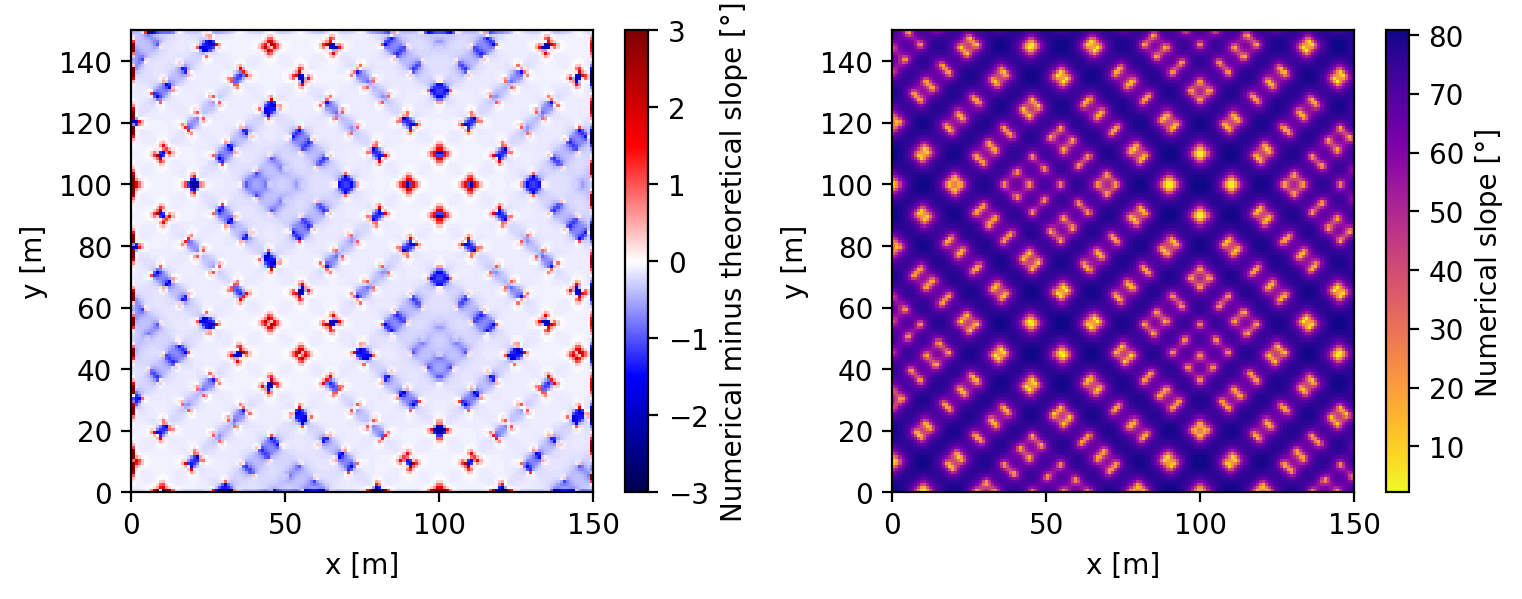

In [4]:
# numerical slope
dy, dx = np.gradient(dtm, resolution)
nslp = 180 / np.pi * np.arctan(np.sqrt(dx * dx + dy * dy))

fg, ax = pl.subplots(1, 2, figsize=(9, 3))
im = ax[0].pcolormesh(x, y, nslp - slp, vmin=-3, vmax=3, cmap="seismic")
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[0])
cb.set_label("Numerical minus theoretical slope [°]")
im = ax[1].pcolormesh(x, y, nslp, cmap="plasma_r")
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[1])
cb.set_label("Numerical slope [°]")
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
pl.show()

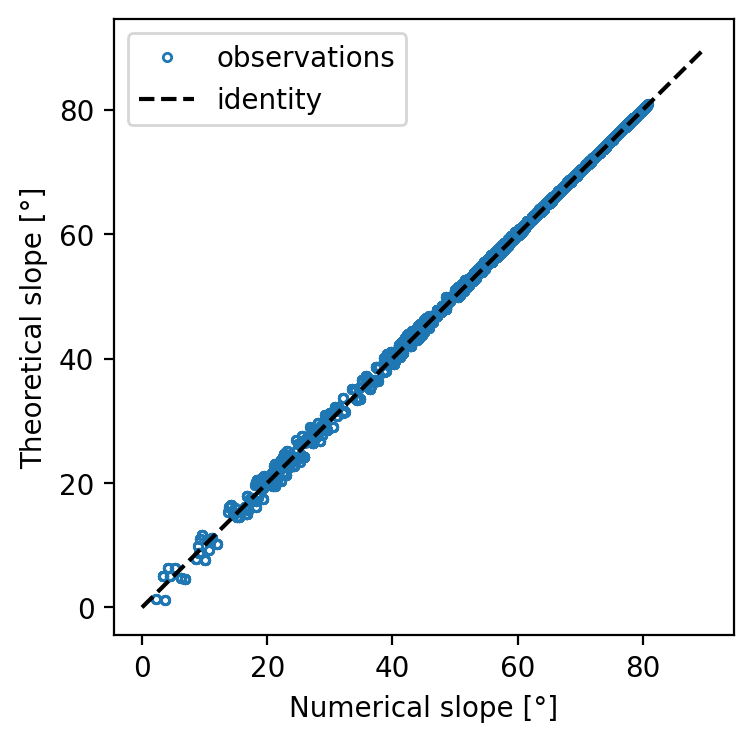

In [5]:
fg, ax = pl.subplots(figsize=(4, 4))
ax.plot(
    nslp[1:-1, 1:-1].ravel(),
    slp[1:-1, 1:-1].ravel(),
    ".",
    mfc="none",
    label="observations",
)
ax.plot([0, 90], [0, 90], "k--", label="identity")
ax.set_xlabel("Numerical slope [°]")
ax.set_ylabel("Theoretical slope [°]")
pl.legend()
pl.show()

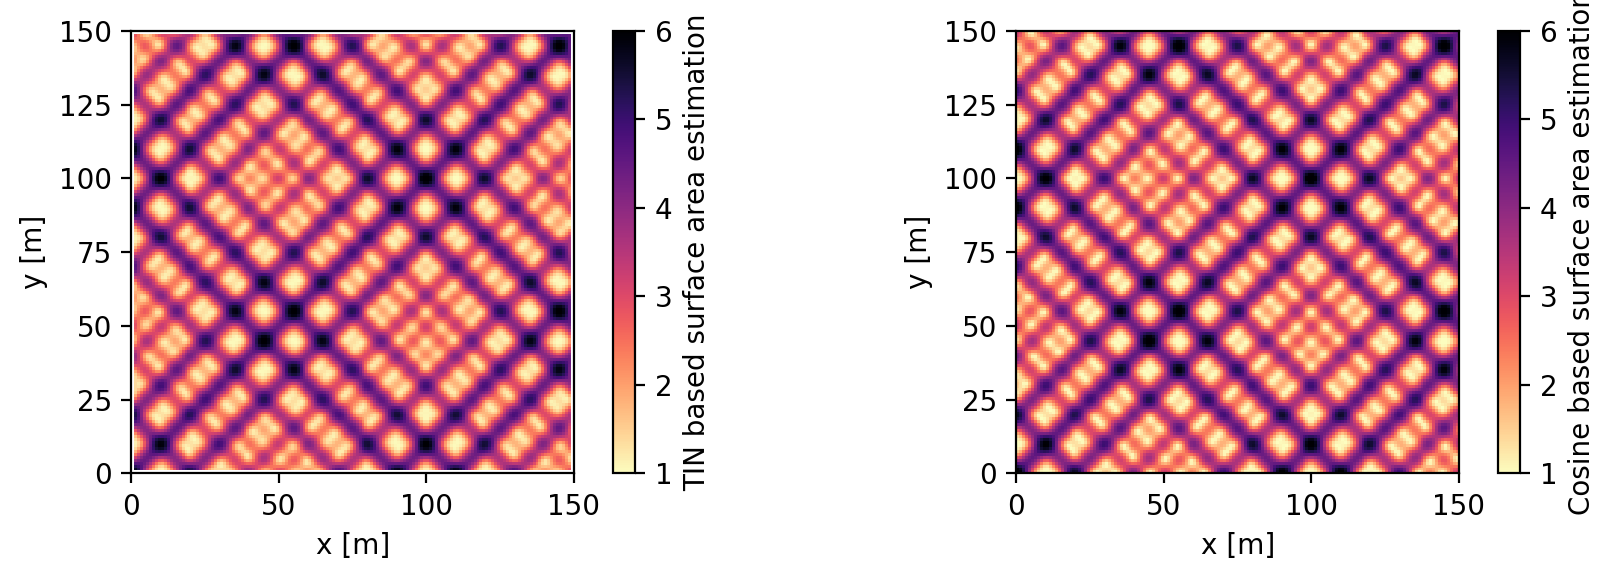

In [6]:
# TIN based surface area according to Jennes et al.
sa_tin = sa.surface_area_tin(dtm, resolution)

# COS based surface area according to our method
sa_cos = sa.surface_area_cos(dtm, resolution)

fg, ax = pl.subplots(1, 2, figsize=(9, 3))
im = ax[0].pcolormesh(x, y, sa_tin, vmin=1, vmax=6, cmap="magma_r")
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[0])
cb.set_label("TIN based surface area estimation")
im = ax[1].pcolormesh(x, y, sa_cos, vmin=1, vmax=6, cmap="magma_r")
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[1])
cb.set_label("Cosine based surface area estimation")
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
pl.tight_layout()
pl.show()

In [7]:
# theoretical surface area using numerical integration
sa_num = sa.synthetic_landscape_surface_area(x, y, landscape_type="sincos", amplitude=100)

100%|███████████████████████████████| 150/150 [01:28<00:00,  1.69it/s]


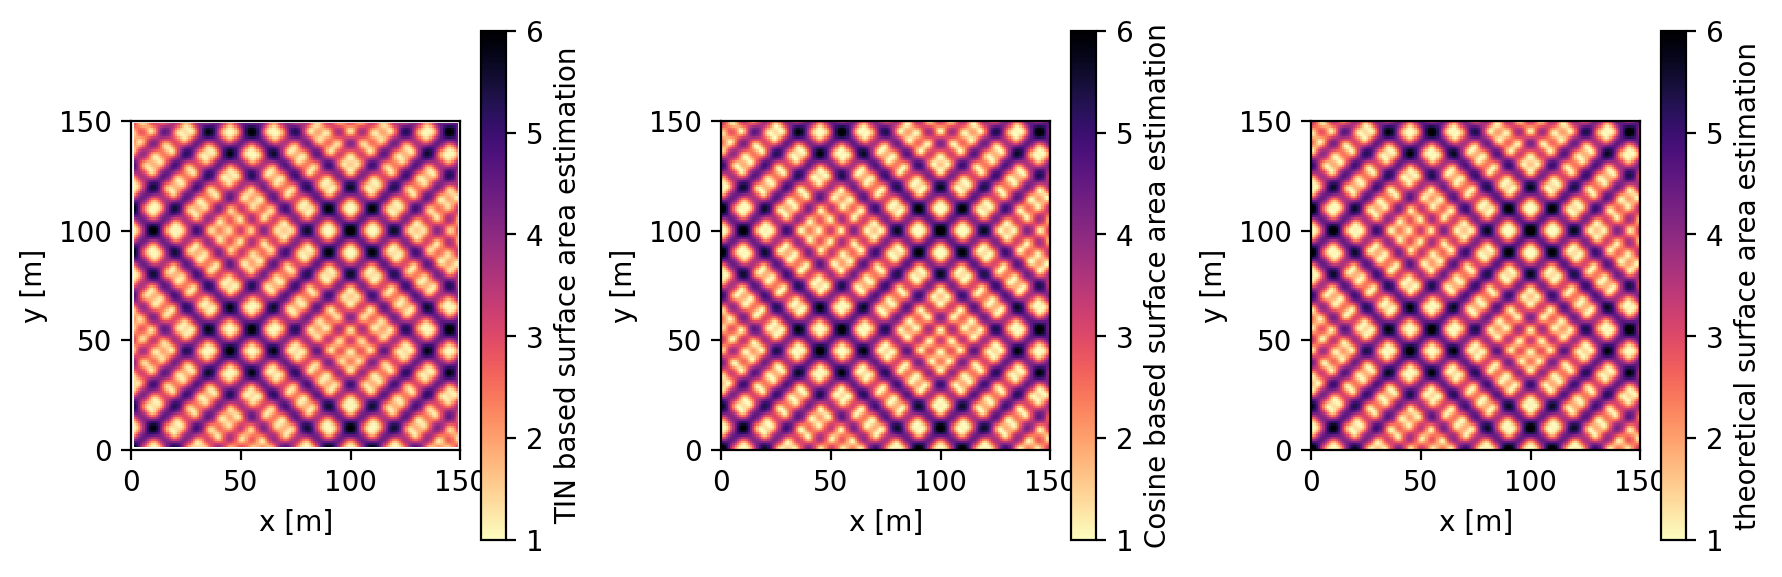

In [8]:
fg, ax = pl.subplots(1, 3, figsize=(9, 3))
im = ax[0].pcolormesh(x, y, sa_tin, vmin=1, vmax=6, cmap="magma_r")
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[0])
cb.set_label("TIN based surface area estimation")
im = ax[1].pcolormesh(x, y, sa_cos, vmin=1, vmax=6, cmap="magma_r")
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[1])
cb.set_label("Cosine based surface area estimation")
im = ax[2].pcolormesh(x, y, sa_num, vmin=1, vmax=6, cmap="magma_r")
ax[2].set_xlabel("x [m]")
ax[2].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[2])
cb.set_label("theoretical surface area estimation")
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
ax[2].set_aspect("equal")
pl.tight_layout()
pl.show()

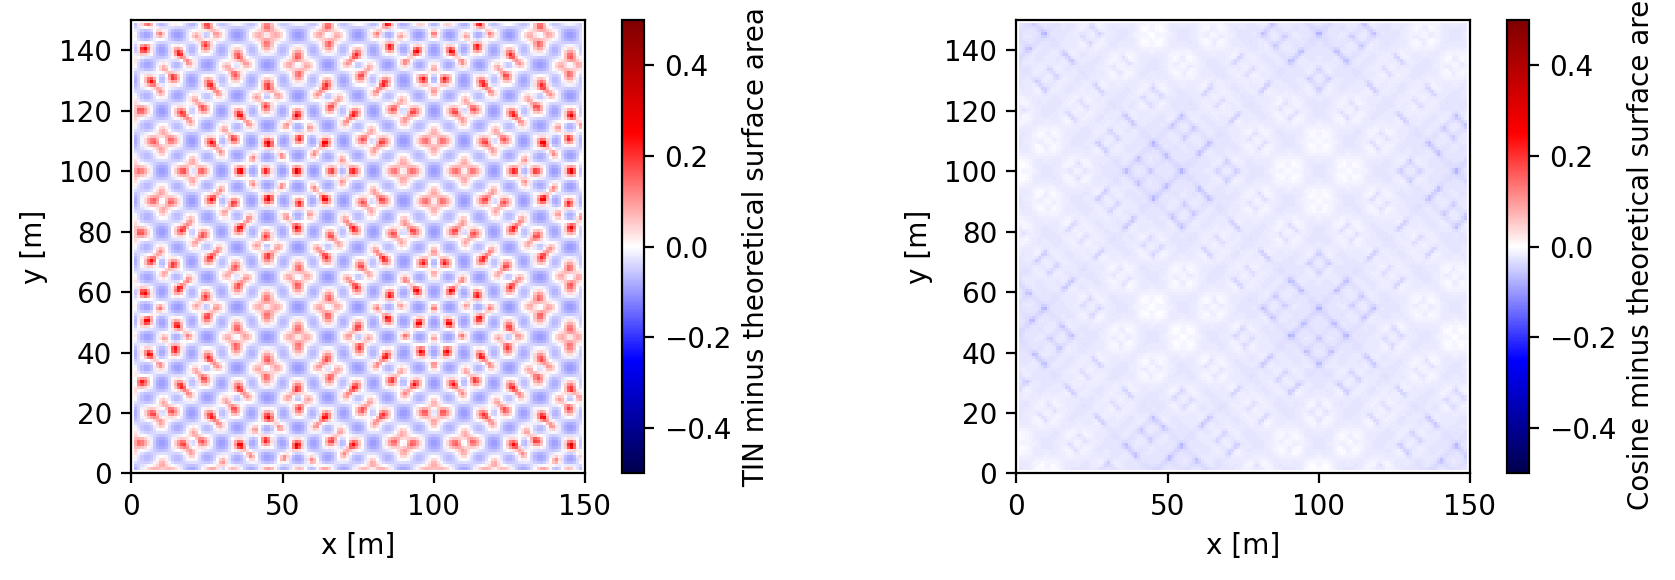

In [9]:
sa_num[0, :] = np.nan
sa_num[-1, :] = np.nan
sa_num[:, 0] = np.nan
sa_num[:, 0 - 1] = np.nan

fg, ax = pl.subplots(1, 2, figsize=(9, 3))
im = ax[0].pcolormesh(x, y, sa_tin - sa_num, vmin=-0.5, vmax=0.5, cmap="seismic")
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[0])
cb.set_label("TIN minus theoretical surface area")
im = ax[1].pcolormesh(x, y, sa_cos - sa_num, vmin=-0.5, vmax=0.5, cmap="seismic")
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("y [m]")
cb = fg.colorbar(im, ax=ax[1])
cb.set_label("Cosine minus theoretical surface area")
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
pl.tight_layout()
pl.show()

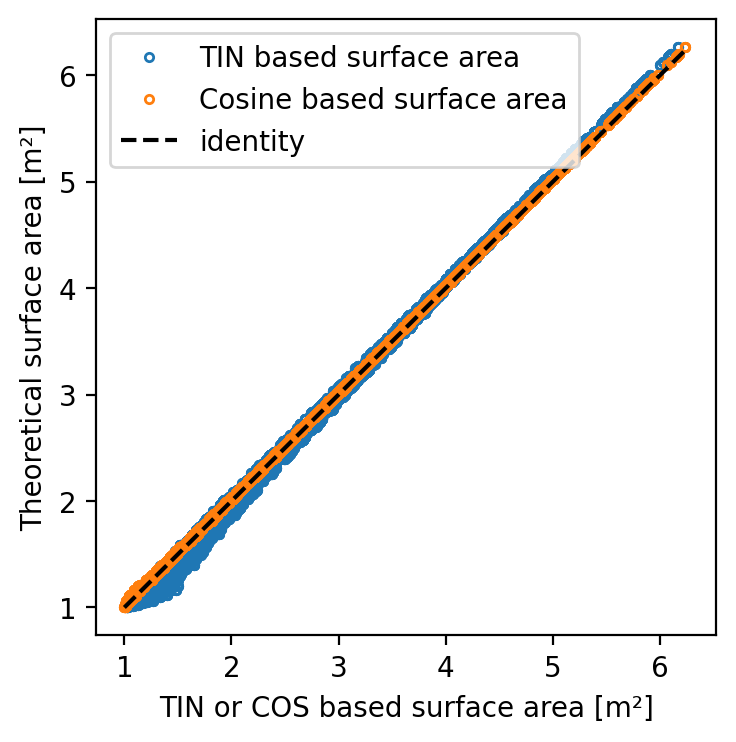

In [10]:
fg, ax = pl.subplots(figsize=(4, 4))
ax.plot(
    sa_tin[1:-1, 1:-1].ravel(),
    sa_num[1:-1, 1:-1].ravel(),
    ".",
    mfc="none",
    label="TIN based surface area",
)
ax.plot(
    sa_cos[1:-1, 1:-1].ravel(),
    sa_num[1:-1, 1:-1].ravel(),
    ".",
    mfc="none",
    label="Cosine based surface area",
)
ax.plot([1, np.nanmax(sa_num)], [1, np.nanmax(sa_num)], "k--", label="identity")
ax.set_xlabel("TIN or COS based surface area [m²]")
ax.set_ylabel("Theoretical surface area [m²]")
pl.legend()
pl.show()

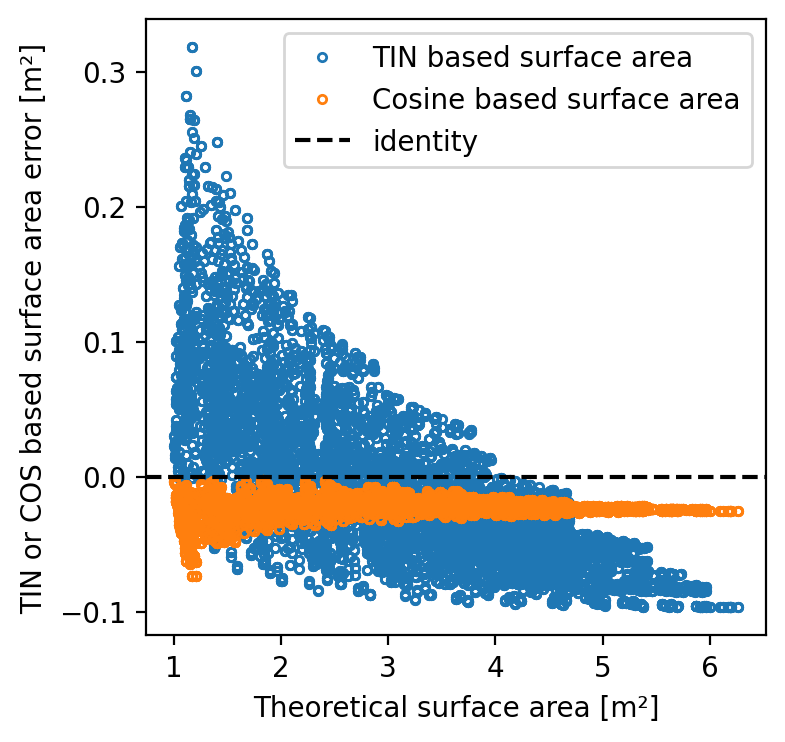

In [11]:
fg, ax = pl.subplots(figsize=(4, 4))
ax.plot(
    sa_num[1:-1, 1:-1].ravel(),
    sa_tin[1:-1, 1:-1].ravel() - sa_num[1:-1, 1:-1].ravel(),
    ".",
    mfc="none",
    label="TIN based surface area",
)
ax.plot(
    sa_num[1:-1, 1:-1].ravel(),
    sa_cos[1:-1, 1:-1].ravel() - sa_num[1:-1, 1:-1].ravel(),
    ".",
    mfc="none",
    label="Cosine based surface area",
)
ax.axhline(y=0, color="k", linestyle="--", label="identity")
ax.set_ylabel("TIN or COS based surface area error [m²]")
ax.set_xlabel("Theoretical surface area [m²]")
pl.legend()
pl.show()